In [1]:
%load_ext autoreload
%autoreload 2


### Necessary Imports
Following notebook uses python chess package and core functionality from custom SARFA package such as computing SARFA metric, visualization of board, etc.

In [4]:
import chess
from sarfa import core, BoardVisualization, SarfaBaseline, Engine, AddPerturber
from sarfa.utils import get_all_pos, read_fens
from IPython.display import Image, display
from collections import defaultdict

### Additive Perturbations
Additive perturbations are the key novelty of the empty space saliency method. Empty saliency is detected by looking at each empty square individually and adding a pawn of the the same color as whose turn it is. Then, the Q-value distribution before ($s$) and after ($s'$) this perturbation is used as the input to the SARFA computation (refer to sarfa_baseline.ipynb).

The AddPerturber class acts as a generator for all perturbed board states associated with each originally empty square. The function then iterates through these board states and calculates the saliency for the empty square based on the chosen action. The final output includes a dictionary that stores the saliency of all empty squares.

In [3]:
def saliency_algorithm_empty_spaces(fen, action=None) -> dict[str, float]:
    board = chess.Board(fen)

    saliency_results: dict[str, float] = defaultdict(int)
    perturber = AddPerturber(board)
    saliency_calculator = SarfaBaseline(engine, board)
    optimal_move_original_board = action

    for perturbed_board, perturbed_position_str in perturber.process():
        sarfa_compute_result = saliency_calculator.compute(perturbed_board, 
        action)
        saliency = sarfa_compute_result.saliency
        optimal_move = sarfa_compute_result.optimal_move

        if (optimal_move_original_board == None):
            optimal_move_original_board = chess.Move.from_uci(optimal_move)
        
        saliency_results[perturbed_position_str] = saliency

    return saliency_results, optimal_move_original_board

### Testing on Relevant Boards
FENs are a compact string representation of chess boards. The following section allows for testing of the empty space saliency method on a variety of relevant FENs. These FENs are stored in .txt files under the test_fens/ folder. The user can change the index of the FEN (up to the number of FENs in the file) to run the evaulation on a different board. 

The code also initializes an Engine class that is a wrapper around the chess.engine functionality provided by the python-chess library. In this case, we are using an executable file for Stockfish, which is a commonly used computer engine in the chess community.

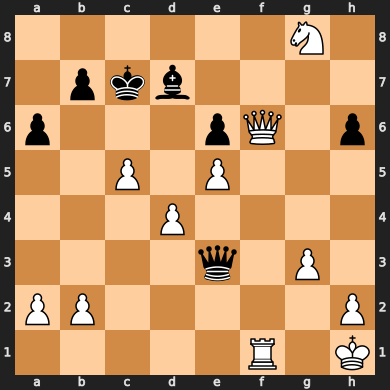

In [5]:
idx = 0
fens = read_fens('./test_fens/empty_space_fens.txt')
FEN = fens[idx]
board = chess.Board(FEN)

engine = Engine("./stockfish_15_x64_avx2")
board_visualization = BoardVisualization(board)
board_visualization.only_board()

In [ ]:
saliency_results, optimal_move = saliency_algorithm_empty_spaces(FEN)

In [8]:
# List saliency results dictionary of form {<empty space>: <saliency>}
saliency_results

defaultdict(int,
            {'a1': 0,
             'a3': 0,
             'a4': 0,
             'a5': 1.0730335032808366e-07,
             'a7': 0,
             'a8': 7.824045758885504e-08,
             'b1': 0,
             'b3': 0,
             'b4': 9.901945505905627e-08,
             'b5': 0,
             'b6': 0,
             'b8': 0,
             'c1': 0,
             'c2': 0,
             'c3': 0,
             'c4': 0,
             'c6': 0.08758714366942785,
             'c8': 3.190916843099852e-06,
             'd1': 0,
             'd2': 0,
             'd3': 0,
             'd5': 0.7998827859179535,
             'd6': 0,
             'd8': 2.147657021099213e-06,
             'e1': 0,
             'e2': 0,
             'e4': 0.5928645648194754,
             'e7': 3.8352209165657303e-07,
             'e8': 3.814718290812373e-06,
             'f2': 0.04901686175065372,
             'f3': 0.2591479152297154,
             'f4': 0,
             'f5': 0,
             'f7': 9.1240179

### Explanation of Results
The following cell shows a heatmap visualization of the empty space saliency for the highlighted move (Bc6). Based on the saliency_results dictionary, the visualization uses a cutoff to color specific empty spaces. As can be seen, d5 and e4 are crucial spaces that need to be empty for the move to deliver check to white king. This shows the potency of this new method.

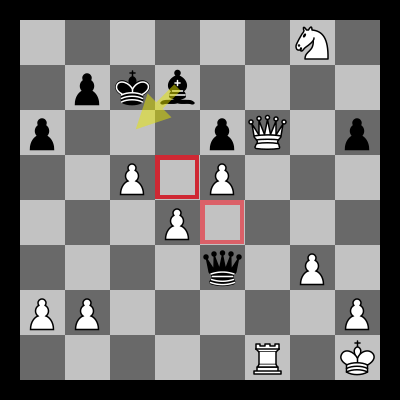

In [9]:
path = board_visualization.show_heatmap(saliency_results, optimal_move)
display(Image(path))